# Data Modeling and Forecasting for Capstone 2 - Solar Plants Data

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime as dt
import matplotlib.dates as mdates
import calplot

from dateutil.relativedelta import relativedelta
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from pandas.tseries.offsets import DateOffset
from pmdarima.arima import auto_arima
from fbprophet import Prophet

In [121]:
# Create DataFrames

sp_df = pd.read_csv('../Data/Proc/sp_df.csv')
p1_dt = pd.read_csv('../Data/Proc/p1_dt.csv')
p2_dt = pd.read_csv('../Data/Proc/p2_dt.csv')

train_11 = pd.read_csv('../Data/Proc/train_11.csv')
test_11 = pd.read_csv('../Data/Proc/test_11.csv')

train_14 = pd.read_csv('../Data/Proc/train_14.csv', index_col=0)
test_14 = pd.read_csv('../Data/Proc/test_14.csv', index_col=0)
train_24 = pd.read_csv('../Data/Proc/train_24.csv', index_col=0)
test_24 = pd.read_csv('../Data/Proc/test_24.csv', index_col=0)
train_34 = pd.read_csv('../Data/Proc/train_34.csv', index_col=0)
test_34 = pd.read_csv('../Data/Proc/test_34.csv', index_col=0)
train_44 = pd.read_csv('../Data/Proc/train_44.csv', index_col=0)
test_44 = pd.read_csv('../Data/Proc/test_44.csv', index_col=0)

train_fcst1 = pd.read_csv('../Data/Proc/train_fcst1.csv')
test_fcst1 = pd.read_csv('../Data/Proc/test_fcst1.csv')


In [10]:
train_11.sample(5), test_11.sample(5)

(                       DAILY_YIELD
 DATE_TIME                         
 2020-06-03 01:00:00       0.000000
 2020-06-04 00:30:00       0.000000
 2020-05-19 04:15:00       0.000000
 2020-05-18 14:00:00   77105.910715
 2020-05-19 14:30:00  115342.428570,
                        DAILY_YIELD
 DATE_TIME                         
 2020-06-10 18:45:00  141696.000000
 2020-06-11 02:45:00       0.000000
 2020-06-17 07:00:00     362.660714
 2020-06-12 19:00:00  127815.000000
 2020-06-12 22:30:00  127815.000000)

In [11]:
train_14.sample(5), test_14.sample(5)

(                       DAILY_YIELD
 DATE_TIME                         
 2020-05-19 01:45:00       0.000000
 2020-05-18 20:45:00  117738.000000
 2020-05-18 19:30:00  117738.000000
 2020-05-15 12:30:00   69163.071429
 2020-05-20 13:00:00  118893.464285,
                        DAILY_YIELD
 DATE_TIME                         
 2020-05-23 18:45:00  186728.000000
 2020-05-22 03:30:00       0.000000
 2020-05-22 07:15:00    3209.375000
 2020-05-23 03:45:00       0.000000
 2020-05-23 08:45:00   18317.589285)

In [12]:
train_24.sample(5), test_24.sample(5)

(                      DAILY_YIELD
 DATE_TIME                        
 2020-05-29 20:15:00  80126.000000
 2020-05-26 03:45:00      0.000000
 2020-05-28 03:00:00      0.000000
 2020-05-28 06:00:00     17.071429
 2020-05-26 01:15:00      0.000000,
                        DAILY_YIELD
 DATE_TIME                         
 2020-05-30 14:00:00  103825.160714
 2020-05-30 20:45:00  159056.000000
 2020-05-30 03:00:00       0.000000
 2020-06-01 09:15:00   27738.464284
 2020-05-30 06:30:00     355.232143)

In [13]:
train_34.sample(5), test_34.sample(5)

(                       DAILY_YIELD
 DATE_TIME                         
 2020-06-03 11:45:00   65868.250000
 2020-06-04 04:15:00       0.000000
 2020-06-03 06:30:00     344.910714
 2020-06-05 15:00:00  133762.160715
 2020-06-04 20:30:00   80142.000000,
                        DAILY_YIELD
 DATE_TIME                         
 2020-06-07 14:00:00  120484.321430
 2020-06-08 16:45:00  176022.714286
 2020-06-07 22:45:00  168197.000000
 2020-06-08 09:30:00   29294.571427
 2020-06-07 17:45:00  167345.249999)

In [14]:
train_44.sample(5), test_44.sample(5)

(                       DAILY_YIELD
 DATE_TIME                         
 2020-06-10 05:30:00       0.000000
 2020-06-11 16:45:00  118644.696431
 2020-06-11 23:00:00  123626.000000
 2020-06-11 17:00:00  120152.428571
 2020-06-11 19:00:00  123626.000000,
                        DAILY_YIELD
 DATE_TIME                         
 2020-06-17 00:30:00       0.000000
 2020-06-16 04:30:00       0.000000
 2020-06-16 01:00:00       0.000000
 2020-06-15 21:00:00  147615.000000
 2020-06-16 07:45:00    5398.928571)

In [15]:
train_fcst1.sample(5), test_fcst1.sample(5)

(                       DAILY_YIELD
 DATE_TIME                         
 2020-06-16 10:45:00   51624.017858
 2020-06-16 20:45:00  136429.000000
 2020-06-16 22:00:00  136429.000000
 2020-06-16 06:00:00       0.125000
 2020-06-15 07:30:00    4330.196429,
                        DAILY_YIELD
 DATE_TIME                         
 2020-06-17 22:00:00  129571.000000
 2020-06-17 16:30:00  125175.482142
 2020-06-17 05:15:00       0.000000
 2020-06-17 10:30:00   35142.142859
 2020-06-17 16:15:00  123726.910714)

### Auto-ARIMA Modeling

In [16]:
arima_11 = auto_arima(train_11,
                         start_p=0,d=1,start_q=0,
                         max_p=4,max_d=4,max_q=4,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=42,n_fits=1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=46823.292, Time=8.13 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=inf, Time=54.06 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=inf, Time=53.22 sec
 ARIMA(0,1,0)(1,1,0)[96]             : AIC=46494.982, Time=46.18 sec
 ARIMA(0,1,0)(1,1,1)[96]             : AIC=inf, Time=48.10 sec
 ARIMA(0,1,0)(0,1,1)[96]             : AIC=inf, Time=82.58 sec
 ARIMA(0,1,1)(1,1,0)[96]             : AIC=46521.538, Time=35.92 sec
 ARIMA(1,1,1)(1,1,0)[96]             : AIC=46523.599, Time=44.58 sec
 ARIMA(0,1,0)(1,1,0)[96] intercept   : AIC=46521.201, Time=50.43 sec

Best model:  ARIMA(0,1,0)(1,1,0)[96]          
Total fit time: 423.336 seconds


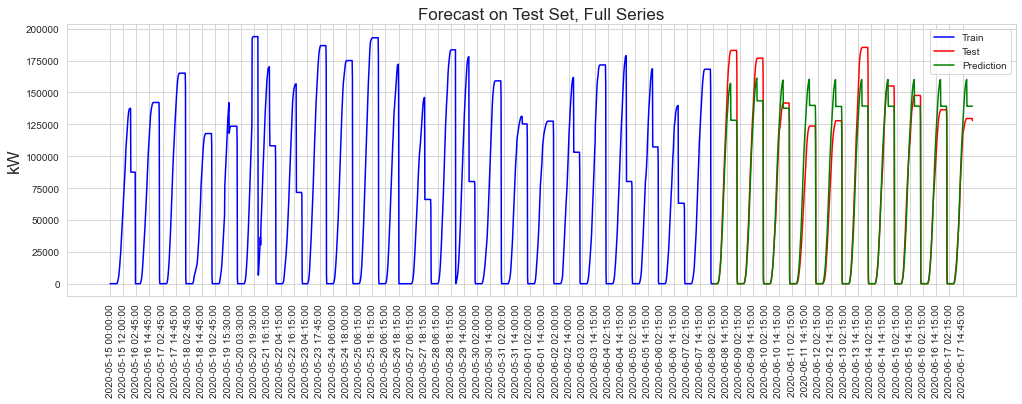

In [24]:
pred_11=pd.DataFrame(arima_11.predict(n_periods=948),index=test_11.index)
pred_11.columns=['predicted_yield']

fig,ax= plt.subplots(figsize=(17,5))
plt.plot(train_11,label='Train',color='blue')
plt.plot(test_11,label='Test',color='r')
plt.plot(pred_11,label='Prediction',color='g')
plt.legend()
plt.title('Forecast on Test Set, Full Series',size=17)
plt.ylabel('kW',fontsize=17)
plt.xticks(np.arange(0, 3158, step=48), rotation=90)
plt.show()

In [25]:
arima_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2209
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 96)   Log Likelihood              -23245.491
Date:                            Tue, 08 Jun 2021   AIC                          46494.982
Time:                                    19:20:16   BIC                          46506.293
Sample:                                         0   HQIC                         46499.124
                                           - 2209                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L96      -0.3810      0.004    -89.791      0.000      -0.389      -0.373
sigma2      2.127e+08   2.03e-12   1.05e+20      0.000    2.13e+08    2.13e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):            456225.97
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                            -3.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        74.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.44e+35. Standard errors may be unstable.
"""

In [127]:
train_11['DATE_TIME'] = pd.to_datetime(train_11['DATE_TIME'])
train_11.set_index('DATE_TIME', inplace=True)

test_11['DATE_TIME'] = pd.to_datetime(test_11['DATE_TIME'])
test_11.set_index('DATE_TIME', inplace=True)

KeyError: 'DATE_TIME'

In [128]:
future_dates11 = [test_11.index[-1] + DateOffset(minutes=x) for x in range(0,4320,15) ]

f_pred11=pd.DataFrame(arima_11.predict(n_periods=288),index=future_dates11)
f_pred11.columns=['predicted_yield']

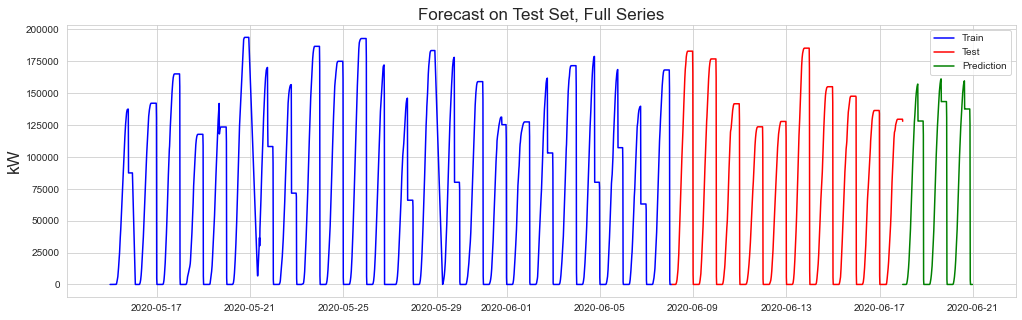

In [130]:
fig,ax= plt.subplots(figsize=(17,5))

plt.plot(train_11,label='Train',color='blue')
plt.plot(test_11,label='Test',color='r')
plt.plot(f_pred11,label='Prediction',color='g')

plt.legend()
plt.title('Forecast on Test Set, Full Series',size=17)
plt.ylabel('kW',fontsize=17)
#plt.xticks(np.arange(0, 3158, step=48), rotation=90)
plt.show()

In [104]:
pred1=p1_dt.copy()
pred1['DATE_TIME'] = pd.to_datetime(pred1['DATE_TIME'])
pred1=pred1.groupby('DATE_TIME').sum()
pred1=pred1['DAILY_YIELD'][-288:].reset_index()


In [94]:
arima_fcst1 = auto_arima(train_fcst1,
                         start_p=0,d=1,start_q=0,
                         max_p=4,max_d=4,max_q=4,
                         start_P=0,D=1,start_Q=0,
                         max_P=1,max_D=1,max_Q=1,m=96,
                         seasonal=True,
                         error_action='warn',trace=True,
                         supress_warning=True,stepwise=True,
                         random_state=20,n_fits=1)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[96]             : AIC=1645.555, Time=0.70 sec
 ARIMA(1,1,0)(1,1,0)[96]             : AIC=1539.889, Time=8.39 sec
 ARIMA(0,1,1)(0,1,1)[96]             : AIC=1541.502, Time=11.86 sec
 ARIMA(1,1,0)(0,1,0)[96]             : AIC=1539.528, Time=1.47 sec
 ARIMA(1,1,0)(0,1,1)[96]             : AIC=1539.889, Time=9.07 sec
 ARIMA(1,1,0)(1,1,1)[96]             : AIC=inf, Time=17.51 sec
 ARIMA(2,1,0)(0,1,0)[96]             : AIC=1538.237, Time=2.32 sec
 ARIMA(2,1,0)(1,1,0)[96]             : AIC=1539.552, Time=14.75 sec
 ARIMA(2,1,0)(0,1,1)[96]             : AIC=1539.555, Time=12.33 sec
 ARIMA(2,1,0)(1,1,1)[96]             : AIC=inf, Time=16.78 sec
 ARIMA(3,1,0)(0,1,0)[96]             : AIC=1530.967, Time=3.03 sec
 ARIMA(3,1,0)(1,1,0)[96]             : AIC=1528.008, Time=15.99 sec
 ARIMA(3,1,0)(1,1,1)[96]             : AIC=inf, Time=27.30 sec
 ARIMA(3,1,0)(0,1,1)[96]             : AIC=1527.753, Time=15.99 sec
 ARIMA(4,1,0)(0,1,1)[96]  

In [137]:
train_fcst1['DATE_TIME'] = pd.to_datetime(train_fcst1['DATE_TIME'])
train_fcst1.set_index('DATE_TIME', inplace=True)

test_fcst1['DATE_TIME'] = pd.to_datetime(test_fcst1['DATE_TIME'])
test_fcst1.set_index('DATE_TIME', inplace=True)

future_dates = [test_fcst1.index[-1] + DateOffset(minutes=x) for x in range(0,4320,15) ]

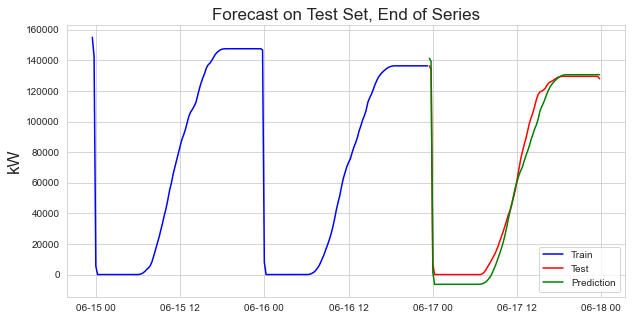

In [138]:
pred_fcst1=pd.DataFrame(arima_fcst1.predict(n_periods=96),index=test_fcst1.index)
pred_fcst1.columns=['predicted_yield']

fig,ax= plt.subplots(figsize=(10,5))

plt.plot(train_fcst1,label='Train',color='blue')
plt.plot(test_fcst1,label='Test',color='r')
plt.plot(pred_fcst1,label='Prediction',color='g')

plt.legend()
plt.title('Forecast on Test Set, End of Series',size=17)
plt.ylabel('kW',fontsize=17)
#plt.xticks(np.arange(0, 789, step=48), rotation=90)
plt.show()

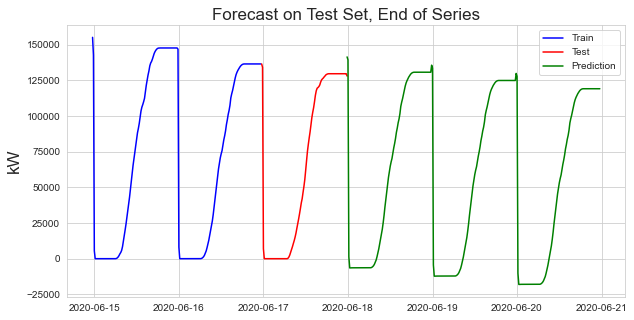

In [140]:
f_predict=pd.DataFrame(arima_fcst1.predict(n_periods=288),index=future_dates)
f_predict.columns=['predicted_yield']

fig,ax= plt.subplots(figsize=(10,5))

plt.plot(train_fcst1,label='Train',color='blue')
plt.plot(test_fcst1,label='Test',color='r')
plt.plot(f_predict,label='Prediction',color='g')

plt.legend()
plt.title('Forecast on Test Set, End of Series',size=17)
plt.ylabel('kW',fontsize=17)
#plt.xticks(np.arange(0, 789, step=48), rotation=90)
plt.show()

In [142]:
arima_fcst1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  192
Model:             SARIMAX(4, 1, 0)x(0, 1, [1], 96)   Log Likelihood                -757.647
Date:                              Wed, 09 Jun 2021   AIC                           1527.294
Time:                                      16:29:54   BIC                           1542.617
Sample:                                           0   HQIC                          1533.486
                                              - 192                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2318      0.025     -9.315      0.000      -0.281      -0.183
ar.L2          0.0985      0.058      1.699      0.089      -0.015       0.212
ar.L3          0.0988      0.041      2.434      0.015       0.019       0.178
ar.L4          0.0265      0.068      0.389      0.697      -0.107       0.160
ma.S.L96      -0.1111      0.053     -2.100      0.036      -0.215      -0.007
sigma2      5.751e+05    6.5e+04      8.852      0.000    4.48e+05    7.02e+05
===================================================================================
Ljung-Box (L1) (Q):                  17.39   Jarque-Bera (JB):                27.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.49   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prophet Modeling

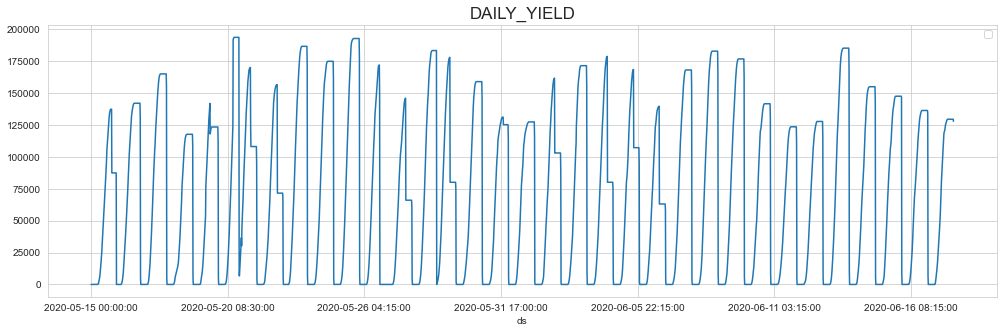

In [84]:
p1_prophet=p1_dt.copy()
p1_prophet=p1_prophet.groupby('DATE_TIME')['DAILY_YIELD'].sum().reset_index()
p1_prophet.rename(columns={'DATE_TIME':'ds','DAILY_YIELD':'y'},inplace=True)
p1_prophet.plot(x='ds',y='y',figsize=(17,5))
plt.legend('')
plt.title('DAILY_YIELD',size=17)
plt.show()

In [85]:
m = Prophet(daily_seasonality=True, weekly_seasonality = True, yearly_seasonality = False)
m.fit(p1_prophet)

In [86]:

future = m.make_future_dataframe(periods=30)
p1proph_pred = m.predict(future)


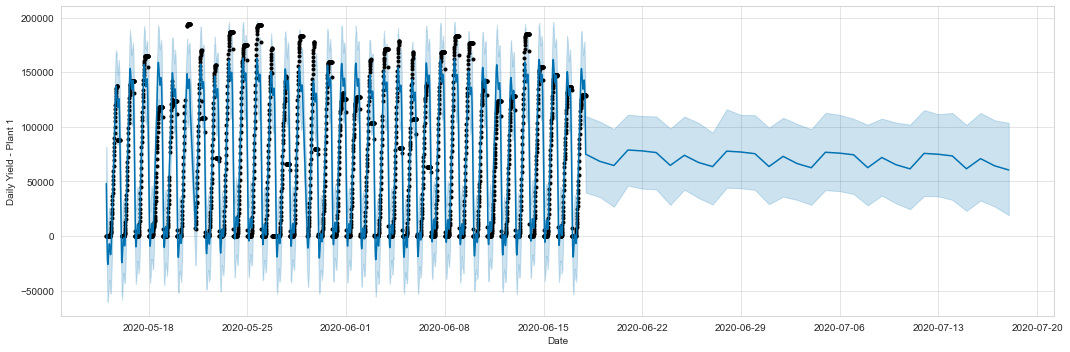

In [87]:

fig1 = m.plot(p1proph_pred, xlabel='Date', ylabel='Daily Yield - Plant 1',figsize = (15,5))
ax = fig.gca()
ax.set_title("Daily Yield Forecast", size=34)
ax.set_xlabel("X", size=34)
ax.set_ylabel("Y", size=34)
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)


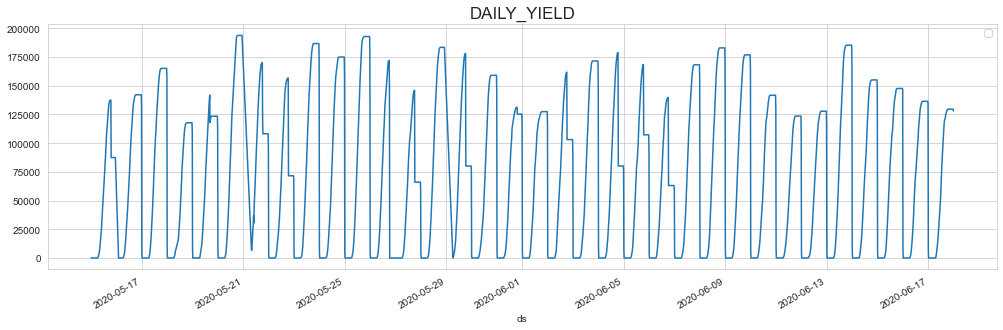

In [70]:
p1_prophet2=p1_dt.copy()
p1_prophet2['DATE_TIME'] = pd.to_datetime(p1_prophet2['DATE_TIME'])
p1_prophet2=p1_prophet2.groupby('DATE_TIME')['DAILY_YIELD'].sum().reset_index()
p1_prophet2.rename(columns={'DATE_TIME':'ds','DAILY_YIELD':'y'},inplace=True)
p1_prophet2.plot(x='ds',y='y',figsize=(17,5))
plt.legend('')
plt.title('DAILY_YIELD',size=17)
plt.show()

In [88]:
m = Prophet(daily_seasonality=True, weekly_seasonality = True, yearly_seasonality = False)
m.fit(p1_prophet2)

In [89]:
future = [p1_prophet2['ds'].iloc[-1:] + DateOffset(minutes=x) for x in range(0,4320,15) ]
time2=pd.DataFrame(future).reset_index().drop('index',1)
time2.rename(columns={3156:'ds'},inplace=True)

timeline=pd.DataFrame(p1_prophet2['ds'])
fut=timeline.append(time2,ignore_index=True)
fut.tail()

time2, fut.tail()

(                     ds
 0   2020-06-17 23:45:00
 1   2020-06-18 00:00:00
 2   2020-06-18 00:15:00
 3   2020-06-18 00:30:00
 4   2020-06-18 00:45:00
 ..                  ...
 283 2020-06-20 22:30:00
 284 2020-06-20 22:45:00
 285 2020-06-20 23:00:00
 286 2020-06-20 23:15:00
 287 2020-06-20 23:30:00
 
 [288 rows x 1 columns],
                       ds
 3440 2020-06-20 22:30:00
 3441 2020-06-20 22:45:00
 3442 2020-06-20 23:00:00
 3443 2020-06-20 23:15:00
 3444 2020-06-20 23:30:00)

In [90]:
forecast = m.predict(fut)

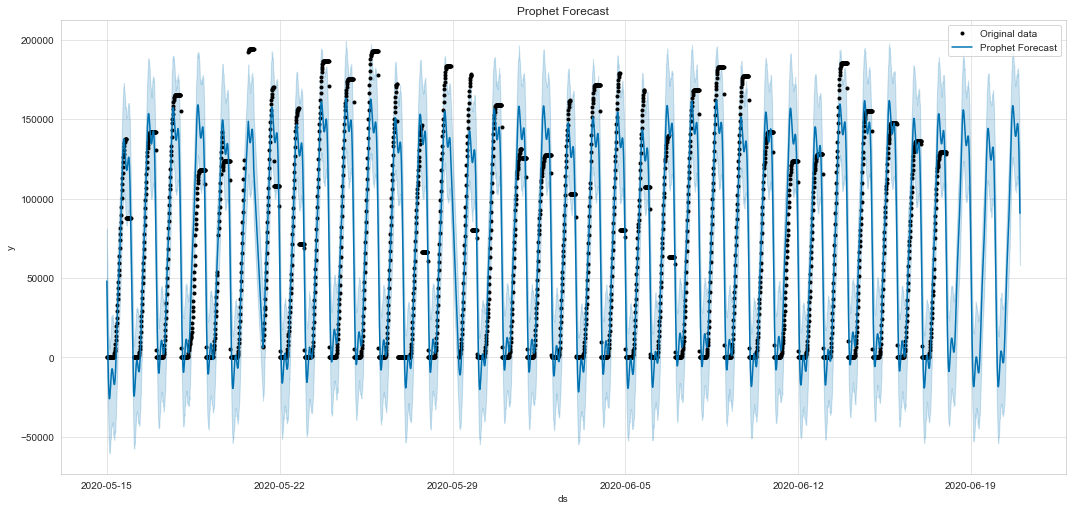

In [91]:
m.plot(forecast,figsize=(15,7))
plt.title('ok')
plt.legend(labels=['Original data','Prophet Forecast'])
plt.title('Prophet Forecast')
plt.show()

In [133]:
test2=pd.DataFrame(test_11.index)
test2.rename(columns={'DATE_TIME':'ds'},inplace=True)
test_prophet=m.predict(test2)

### Model Metrics

In [136]:
print('SARIMAX R2 Score: %f' % (r2_score(pred_11['predicted_yield'],test_11['DAILY_YIELD'])))
print('SARIMAX EndOfSeries R2 Score: %f' % (r2_score(pred_fcst1['predicted_yield'],test_fcst1['DAILY_YIELD'])))
print('Prophet R2 Score: %f' % (r2_score(test_11['DAILY_YIELD'],test_prophet['yhat'])))
print('*'*25)
print('SARIMAX MAE Score: %f' % (mean_absolute_error(pred_11['predicted_yield'],test_11['DAILY_YIELD'])))
print('SARIMAX EndOfSeries MAE Score: %f' % (mean_absolute_error(pred_fcst1['predicted_yield'],test_fcst1['DAILY_YIELD'])))
print('Prophet MAE Score: %f' % (mean_absolute_error(test_11['DAILY_YIELD'],test_prophet['yhat'])))
print('*'*25)
print('SARIMAX RMSE Score: %f' % (mean_squared_error(pred_11['predicted_yield'],test_11['DAILY_YIELD'],squared=False)))
print('SARIMAX EndOfSeries RMSE Score: %f' % (mean_squared_error(pred_fcst1['predicted_yield'],test_fcst1['DAILY_YIELD'],squared=False)))
print('Prophet RMSE Score: %f' % (mean_squared_error(test_11['DAILY_YIELD'],test_prophet['yhat'],squared=False)))

SARIMAX R2 Score: 0.928394
SARIMAX EndOfSeries R2 Score: 0.986854
Prophet R2 Score: 0.889538
*************************
SARIMAX MAE Score: 10648.491978
SARIMAX EndOfSeries MAE Score: 5473.729280
Prophet MAE Score: 15177.635454
*************************
SARIMAX RMSE Score: 17024.627626
SARIMAX EndOfSeries RMSE Score: 6801.701425
Prophet RMSE Score: 22184.559460


#### *The SARIMAX models have higher R2 scores and lower error values than the Prophet model. This suggests the SARIMAX models are better at generalizing to the test-set and thus likely to create more accurate predictions. The Prophet model runs much quicker than the SARIMAX models and is much easier to implement, however, it is much more of a "black-box". It is much more difficult to understand how the individual terms are being selected and implemented to optimize the model.*